<a href="https://colab.research.google.com/github/bingsen-wang/PowerElectronics/blob/main/PWM_SineTriangle_VaryingReference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Pulse Width Modulation - Varying Modulation Function</h1></b>

Dr. Bingsen Wang

11/23/2023
</center>

#Python Code
The Python code illustrates the basic PWM when the modulation function varies.  

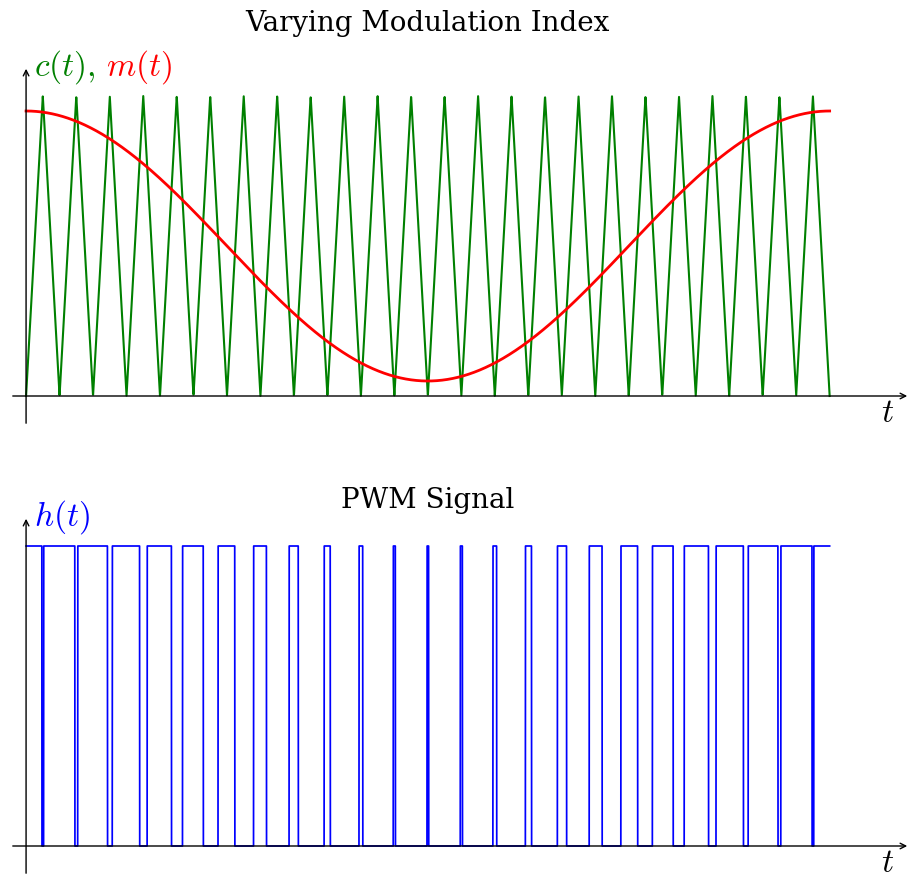

In [13]:
import matplotlib
from os import linesep
from numpy import linspace,cos,pi,sin,random,arccos,heaviside
import matplotlib.pyplot as plt
from matplotlib import animation,rc
rc('animation', html='jshtml')
plt.rcParams.update({"font.family" : "serif","mathtext.fontset" : "cm"})

#functions
def carr(f,t): #carrier
  return 1/pi*arccos(cos(2*pi*f*t))

def m(MI,f,theta,t): #modulation function
  return (MI*cos(2*pi*f*t + theta) + 1)/2

def h(ct,mt): #PWM switching function
  return heaviside(mt-ct,0)

#parameters
Nf = 250 # number of frames
Nppf = 20 # number of points per frame
fc = 24 # carrier frequency
theta = 0 #phase angle of modulation function
theta_v =linspace(theta,theta+pi,Nf) #for animation
fm = 1 # fundamental frequency
fm_v = linspace(fm,2*fm,Nf)
MI = 0.9 # modulation index
MI_v = linspace(MI,0,Nf)


#time series
t=linspace(0,1,Nf*Nppf)
ct = carr(fc,t) #carrier time-domain signal
mt = m(MI,fm,0,t) #modulation function time series
ht = h(ct,mt) #pwm signal time series

#set up figures
fig = plt.figure(figsize=(9,9))
fig.tight_layout()
ax_frame = [[[0, 0.5, 1, .4], [-.02,1.1], [-.1,1.1]], #sine & triangle
            [[0, 0,   1, .4], [-.02,1.1], [-.1,1.1]], # pwm
            ]# [pos-boundary, xlim, ylim] for subplots
ax_lbl=[['$c(t),$', '$t$'], [r'$h(t)$', '$t$'],] #yx axes labels
clst=['g','b','r'] #colors of lines
ax_lst=[] #axis list or the list of subplots
lines = [] #array for all lines
for k in range(len(ax_frame)):
  xn,xm,yn,ym = ax_frame[k][1]+ax_frame[k][2]
  ax=fig.add_axes(ax_frame[k][0],xlim=[xn,xm], ylim=[yn,ym],fc='none') #no fc
  ax.axis('off') #turn off axis frames
  ax_lst.append(ax)
  ax.annotate("", (xm, 0), (xn, 0),arrowprops={'arrowstyle':"->"}) #x-axis
  ax.annotate("", (0,ym), (0,yn),arrowprops={'arrowstyle':"->"}) #y-axis
  if k==0:
    lines.append(ax.plot([], [], clst[k], lw=1.5)[0]) #triangle carrier
    lines.append(ax.plot([], [], clst[k+2], lw=2)[0]) #sine reference
    y_text=ax.text(0.1,ym,'$m(t)$',size=24,va='center',color=clst[k+2]) # addtional ylabel
  else:
    lines.append(ax.plot([], [], clst[k], lw=1.25)[0]) #pwm
  ax.text(xm-.02,0,ax_lbl[k][-1],size=24,va='top',ha='right') #x-axis label
  y_text=ax.text(0.01,ym,ax_lbl[k][0],size=24,va='center',color=clst[k]) #y label
tx0=ax_lst[0].text(0.5,ax_frame[0][2][1]+0.1,'',va='bottom',ha='center',size=20)
ax_lst[1].text(0.5,ax_frame[0][2][1]+0.1,'PWM Signal',va='top',ha='center',size=20)

lines[0].set_data(t,ct) #carrier signal does not change
# animation function. This is called sequentially
def animate(i):
  k = int(i/Nf)
  ii = i%Nf
  if k==0:
    mt = m(MI_v[ii],fm,theta,t)
    ht = h(ct,mt)
    tx0.set_text('Varying Modulation Index')
  elif k==1:
    mt = m(MI,fm_v[ii],theta,t)
    ht = h(ct,mt)
    tx0.set_text('Varying Frequency')
  else:
    mt = m(MI,fm,theta_v[ii],t)
    ht = h(ct,mt)
    tx0.set_text('Varying Phase Angle')
  lines[1].set_data(t,mt)
  lines[2].set_data(t,ht)
  return

anim = animation.FuncAnimation(fig, animate, frames=3*Nf, interval=50)
# anim #uncomment to generate animation in the output area
# to save the animation, uncomment the following three lines
fn = r"PWM_sineTriangle_VaryingRef.mp4"
writervideo = animation.FFMpegWriter(fps=35)
anim.save(fn, writer=writervideo,dpi = 120)